In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np

ModuleNotFoundError: No module named 'Getting_Dataset'

In [4]:
with open("train.pkl","rb") as f:    
    x_train,y_train = pkl.load(f)

In [5]:
with open("test.pkl","rb") as f:    
    x_test,y_test = pkl.load(f)

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [18]:
len(x_train[0][0])

32

In [19]:
y_train[0]

array([6], dtype=uint8)

In [31]:
x_train_scale =x_train/255
x_test_scale = x_test/255

In [14]:
def sample(index):
    plt.figure(figsize=(10,7))
    plt.imshow(x_train_scale[index])

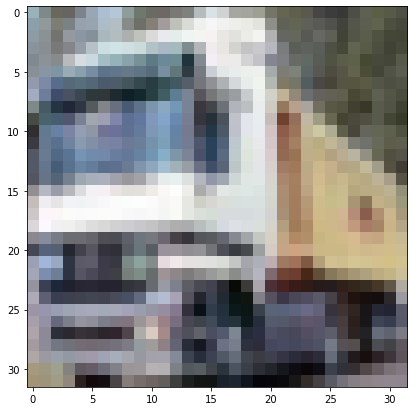

In [15]:
sample(1)

In [39]:
class_label =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [21]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [24]:
y_train_categorical= keras.utils.to_categorical(
    y_train, num_classes=10,dtype='float32'
)
y_train_categorical.shape

(50000, 10)

In [25]:
y_test_categorical =keras.utils.to_categorical(
    y_test,num_classes=10,dtype='float32'
)
y_test_categorical.shape

(10000, 10)

## Model creation

In [29]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(2000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='SGD',
    loss= 'categorical_crossentropy',
    metrics=['accuracy']
    )
model.fit(x_train_scale,y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8099 - accuracy: 0.3564
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6194 - accuracy: 0.4283
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5370 - accuracy: 0.4589
Epoch 4/50
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4806 - accuracy: 0.4772
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4281 - accuracy: 0.4974
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3865 - accuracy: 0.5129
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3491 - accuracy: 0.5284
Epoch 8/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3113 - accuracy: 0.5379
Epoch 9/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2805 - accuracy: 0.5506
Epoch 10/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.247

In [34]:
model.evaluate(x_test_scale,y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.6228 - accuracy: 0.5576


[1.6227937936782837, 0.5576000213623047]

In [35]:
y_pred= model.predict(x_test_scale)

In [57]:
y_pred.shape

(10000, 10)

In [37]:
def test_sample(index):
    plt.figure(figsize=(10,7))
    plt.imshow(x_test_scale[index])

In [54]:
np.argmax(y_pred[0])

3

In [55]:
class_label[0]

'airplane'

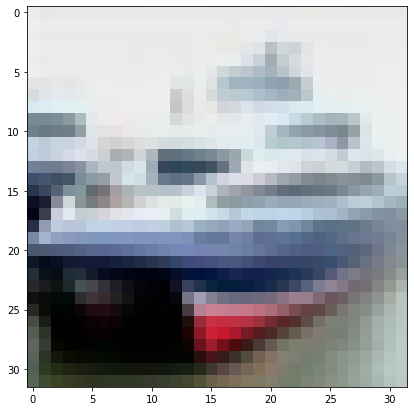

In [53]:
test_sample(1)

In [58]:
def get_model():
    model= keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000,activation='relu'),
        keras.layers.Dense(2000,activation='relu'),
        keras.layers.Dense(10,activation='sigmoid')
    ])
    model.compile(
        optimizer='SGD',
        loss= 'categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

## CPU

In [61]:
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scale,y_train_categorical,epochs=1)

1563/1563 [==============================] - 62s 40ms/step - loss: 1.8139 - accuracy: 0.3546


In [62]:
with tf.device('/GPU:0'):
    gpu_model =get_model()
    gpu_model.fit(x_train_scale,y_train_categorical,epochs=1)

1563/1563 [==============================] - 9s 6ms/step - loss: 1.8097 - accuracy: 0.3558


<table>
    <tr>
        <th>GPU</th>
        <th>CPU</th>
    </tr>
    <tr>
        <th>9.6s</th>
        <th>62.7s</th>
    </tr>
</table>